# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl08_wavenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import tensorflow as tf
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [68]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, "-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

def plot_set(data_x, data_y, data_y_pred):
    l = min(len(data_x),6)
    r = l//1
    c = 1
    fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, figsize=(12, 24), squeeze=False)
    for row in range(r):
        for col in range(c):
            i = row * c + col
            plt.sca(axes[row][col])
            if i < l:
                plot_series(data_x[i, :, 0], data_y[i, 0],data_y_pred[i, 0], 
                        y_label=("$x(t)$" if col==0 else None),
                        legend=(col == 0))
    plt.show()
    
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(12, 8), squeeze=False)
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "g-", label="Actual", markersize=10)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "r-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

# plot_set(X_valid, y_valid, y_pred)

mse:  0.04079282


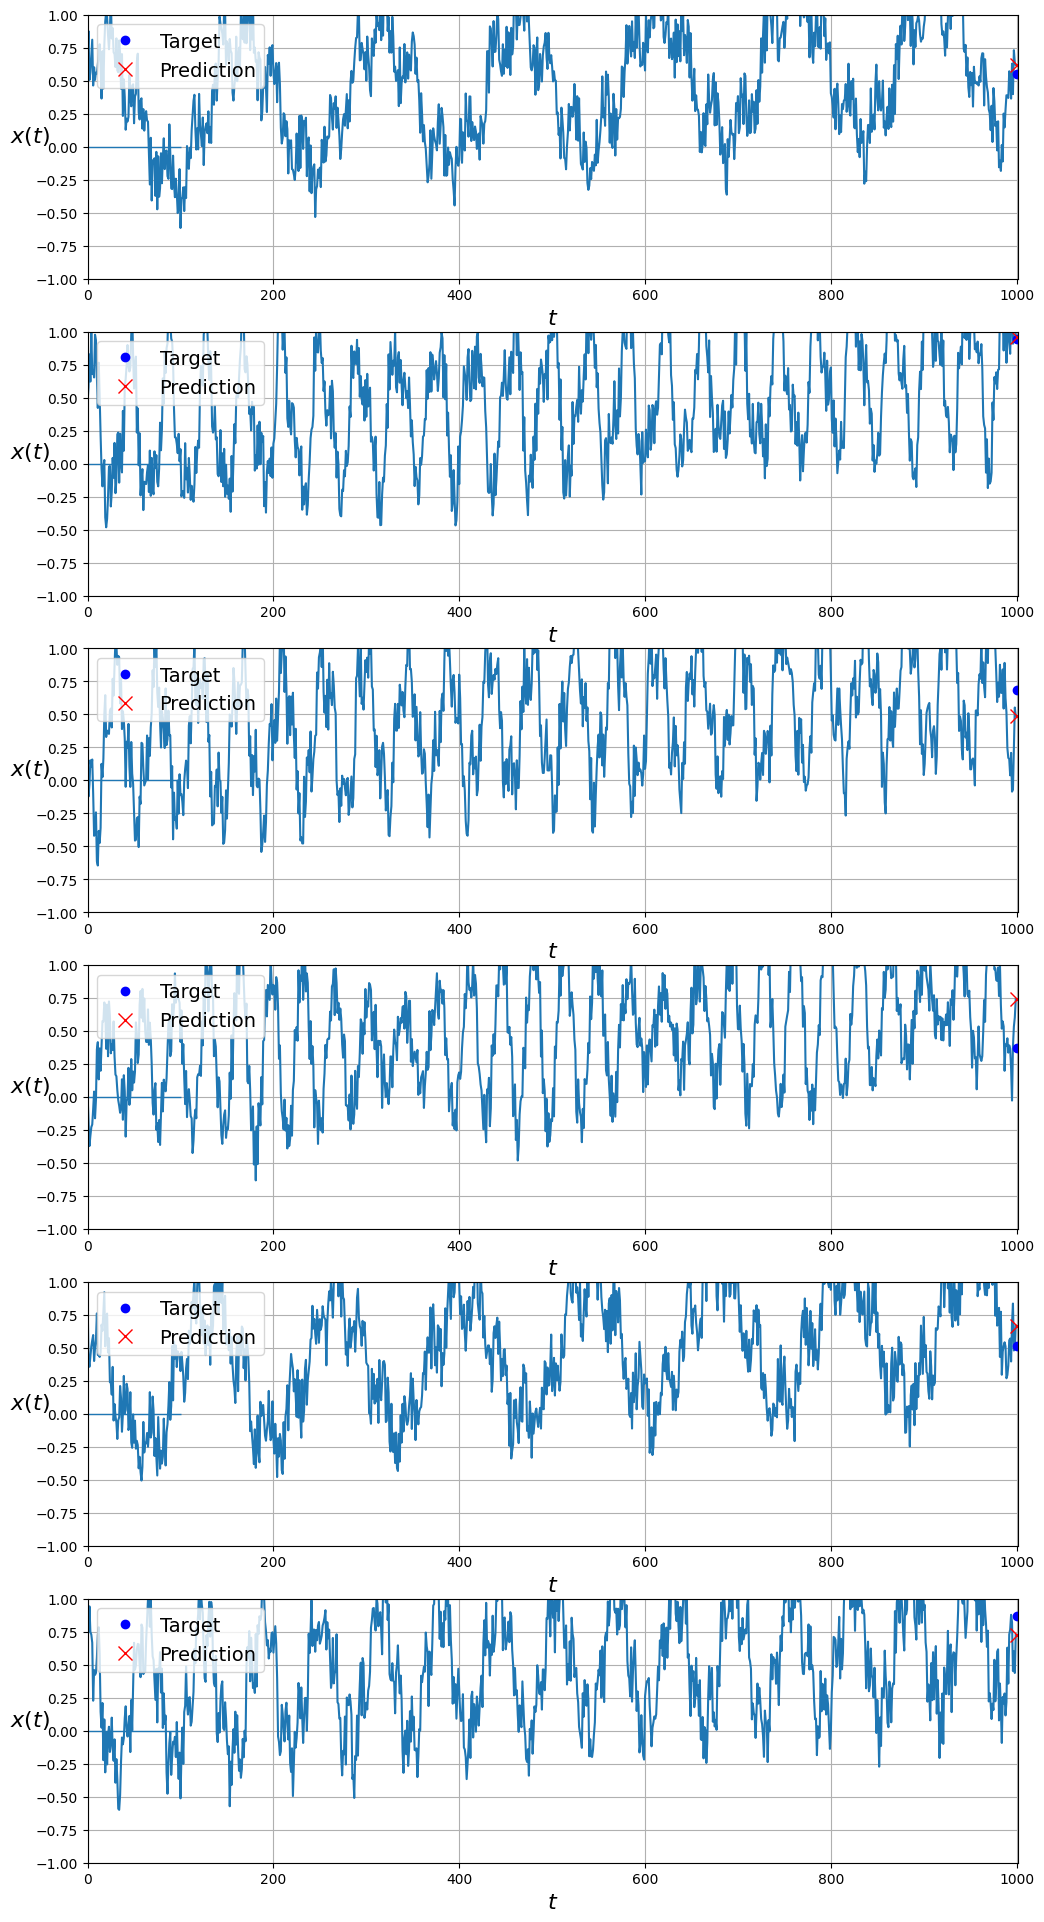

In [164]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 200 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 450 + 50)) # + wave 2
    series += 0.5 * (np.random.rand(batch_size, n_steps) - 0.05)   # + noise
    series += 0.5 * (np.random.rand(1, ) * time)   # + noise
    return series[..., np.newaxis].astype(np.float32)
n_steps = 1000
s = 1000
t = 700
v = 900
series = generate_time_series(s, n_steps + 1)
X_train, y_train = series[:t, :n_steps], series[:t, -1]
X_valid, y_valid = series[t:v, :n_steps], series[t:v, -1]
X_test, y_test = series[v:, :n_steps], series[v:, -1]

y_pred_last = X_valid[:, -1]
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_last)))
# plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plot_set(X_valid, y_valid, y_pred_last)


# linear

In [57]:
model_l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[1000, 1]),
    tf.keras.layers.Dense(1)
])
model_l.compile(loss="mse", optimizer="adam")
history = model_l.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6420 - val_loss: 0.1831
Epoch 2/20
22/22 [==============================] - 0s 1ms/step - loss: 0.1295 - val_loss: 0.0832
Epoch 3/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0646 - val_loss: 0.0465
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.0394
Epoch 5/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.0329
Epoch 6/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0298 - val_loss: 0.0302
Epoch 7/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0276 - val_loss: 0.0291
Epoch 8/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0274
Epoch 9/20
22/22 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0281
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.0278
Epoch 11/20
22/22 [

7/7 [==============================] - 0s 509us/step
mse:  0.02533146


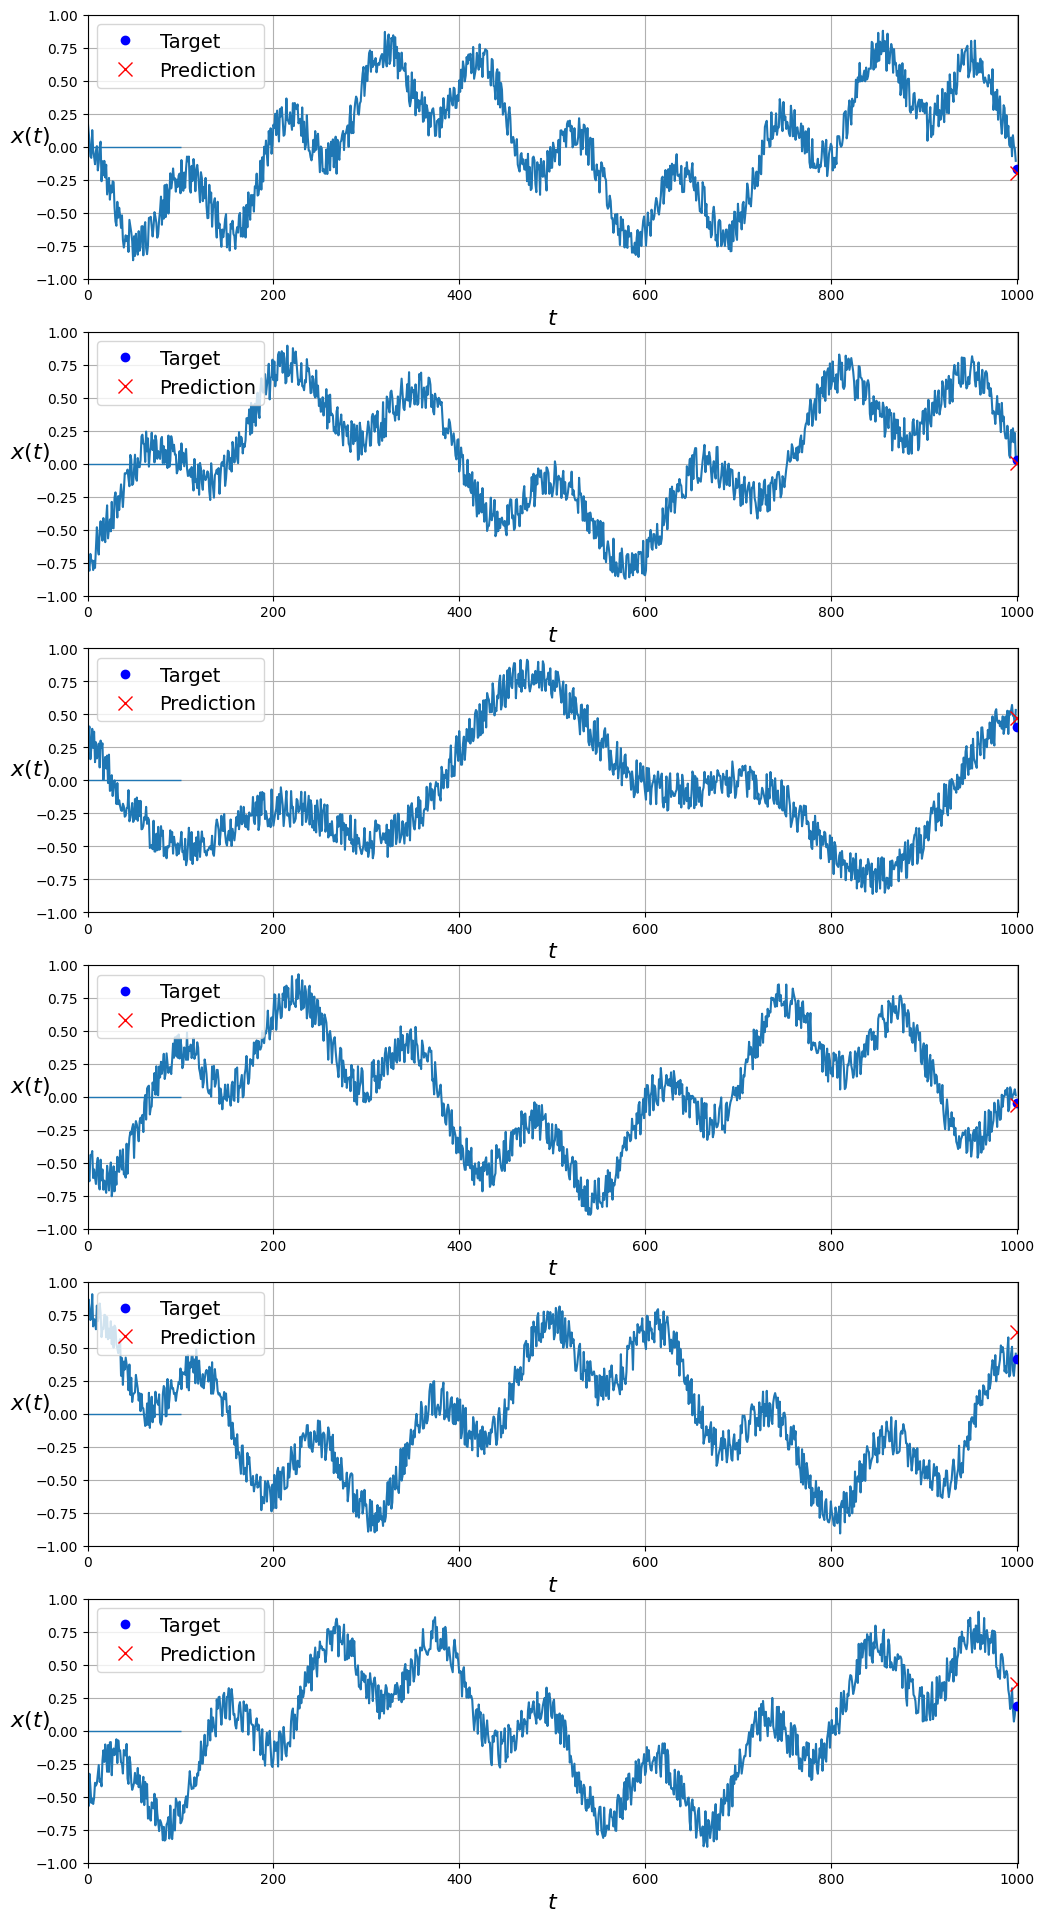

In [58]:
y_pred_lin = model_l.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_lin)))
plot_set(X_valid, y_valid, y_pred_lin)

Epoch 1/20
22/22 [==============================] - 2s 50ms/step - loss: 0.4541 - val_loss: 0.4585
Epoch 2/20
22/22 [==============================] - 1s 44ms/step - loss: 0.4182 - val_loss: 0.4180
Epoch 3/20
22/22 [==============================] - 1s 44ms/step - loss: 0.3861 - val_loss: 0.3850
Epoch 4/20
22/22 [==============================] - 1s 44ms/step - loss: 0.3571 - val_loss: 0.3540
Epoch 5/20
22/22 [==============================] - 1s 43ms/step - loss: 0.3295 - val_loss: 0.3249
Epoch 6/20
22/22 [==============================] - 1s 43ms/step - loss: 0.3034 - val_loss: 0.2975
Epoch 7/20
22/22 [==============================] - 1s 43ms/step - loss: 0.2786 - val_loss: 0.2715
Epoch 8/20
22/22 [==============================] - 1s 43ms/step - loss: 0.2554 - val_loss: 0.2473
Epoch 9/20
22/22 [==============================] - 1s 43ms/step - loss: 0.2338 - val_loss: 0.2248
Epoch 10/20
22/22 [==============================] - 1s 43ms/step - loss: 0.2137 - val_loss: 0.2045
Epoch 11/

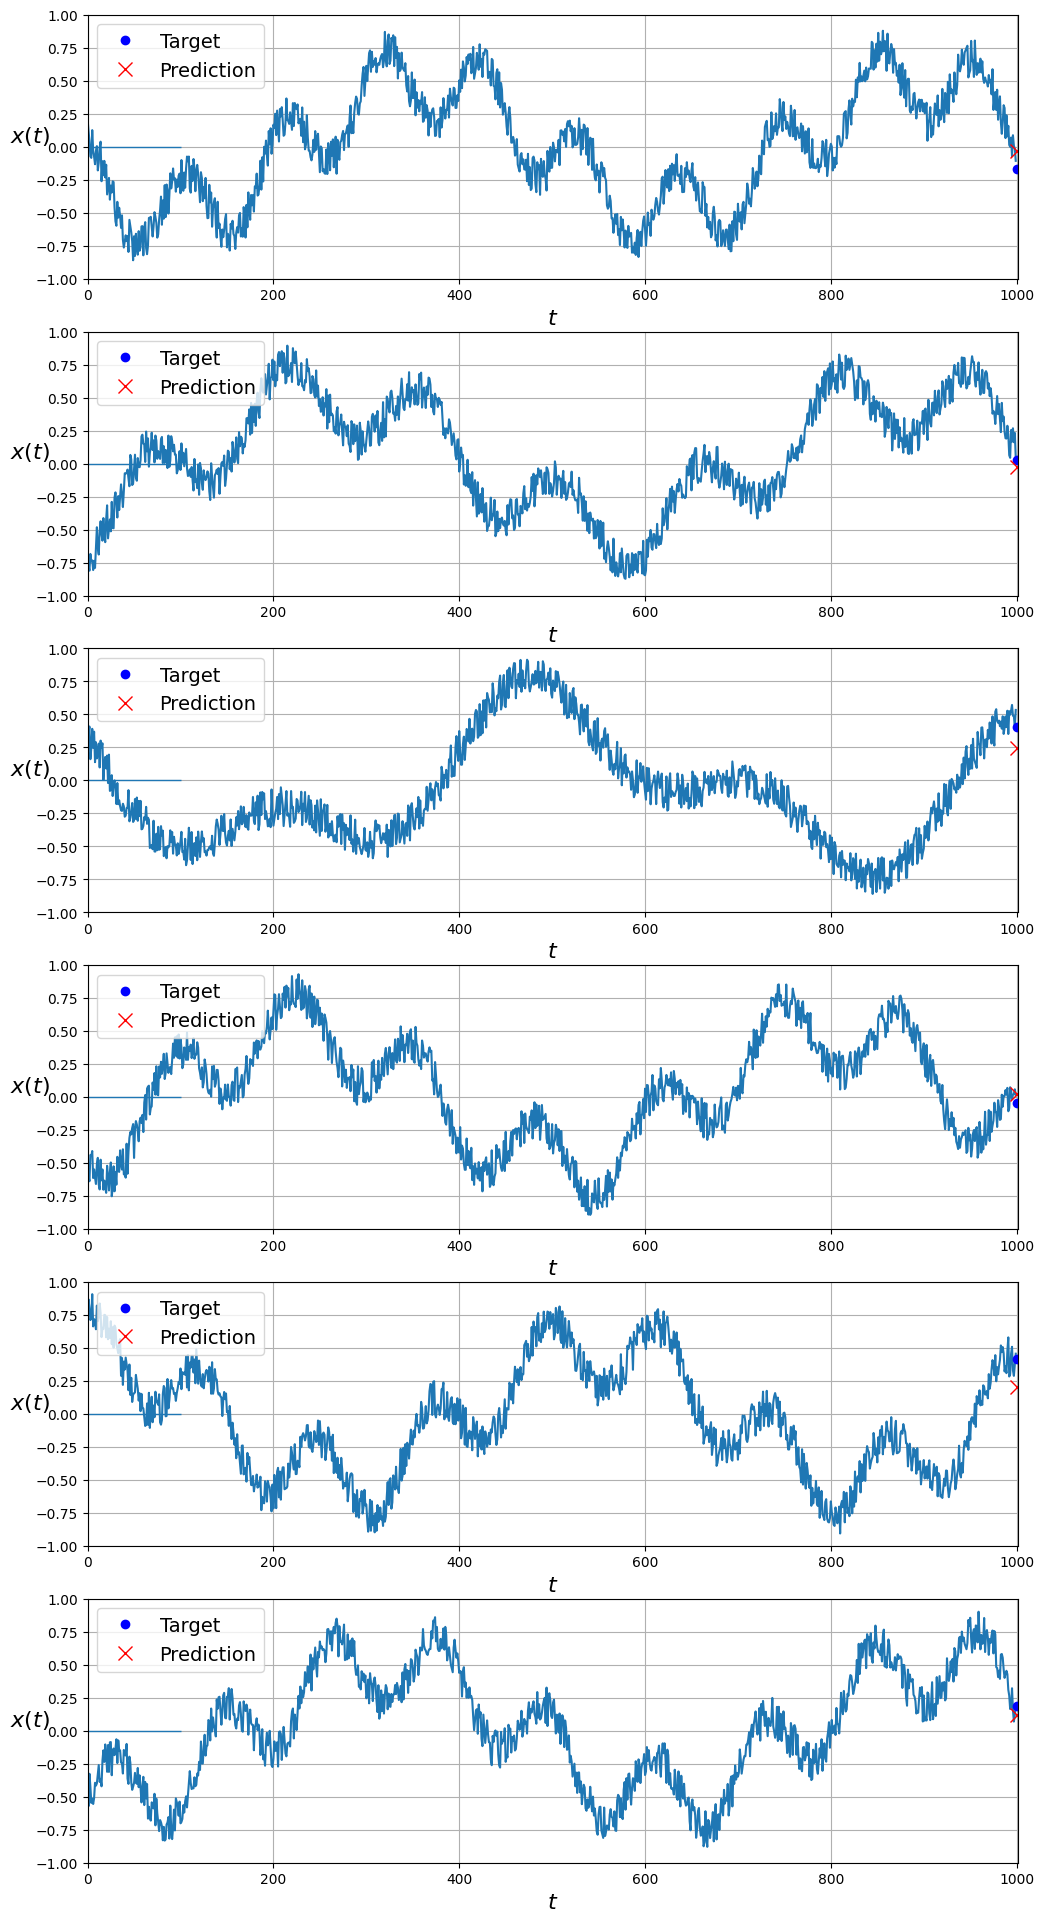

In [59]:
model_rnn1 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model_rnn1.compile(loss="mse", optimizer=optimizer)
model_rnn1.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

y_pred_rnn1 = model_rnn1.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_rnn1)))
plot_set(X_valid, y_valid, y_pred_rnn1)

Epoch 1/20
22/22 [==============================] - 4s 157ms/step - loss: 0.0365 - val_loss: 0.0217
Epoch 2/20
22/22 [==============================] - 3s 142ms/step - loss: 0.0150 - val_loss: 0.0215
Epoch 3/20
22/22 [==============================] - 3s 145ms/step - loss: 0.0176 - val_loss: 0.0138
Epoch 4/20
22/22 [==============================] - 3s 144ms/step - loss: 0.0132 - val_loss: 0.0170
Epoch 5/20
22/22 [==============================] - 3s 148ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 6/20
22/22 [==============================] - 3s 145ms/step - loss: 0.0112 - val_loss: 0.0131
Epoch 7/20
22/22 [==============================] - 3s 144ms/step - loss: 0.0110 - val_loss: 0.0118
Epoch 8/20
22/22 [==============================] - 3s 144ms/step - loss: 0.0104 - val_loss: 0.0115
Epoch 9/20
22/22 [==============================] - 3s 143ms/step - loss: 0.0125 - val_loss: 0.0112
Epoch 10/20
22/22 [==============================] - 3s 144ms/step - loss: 0.0121 - val_loss: 0.0143

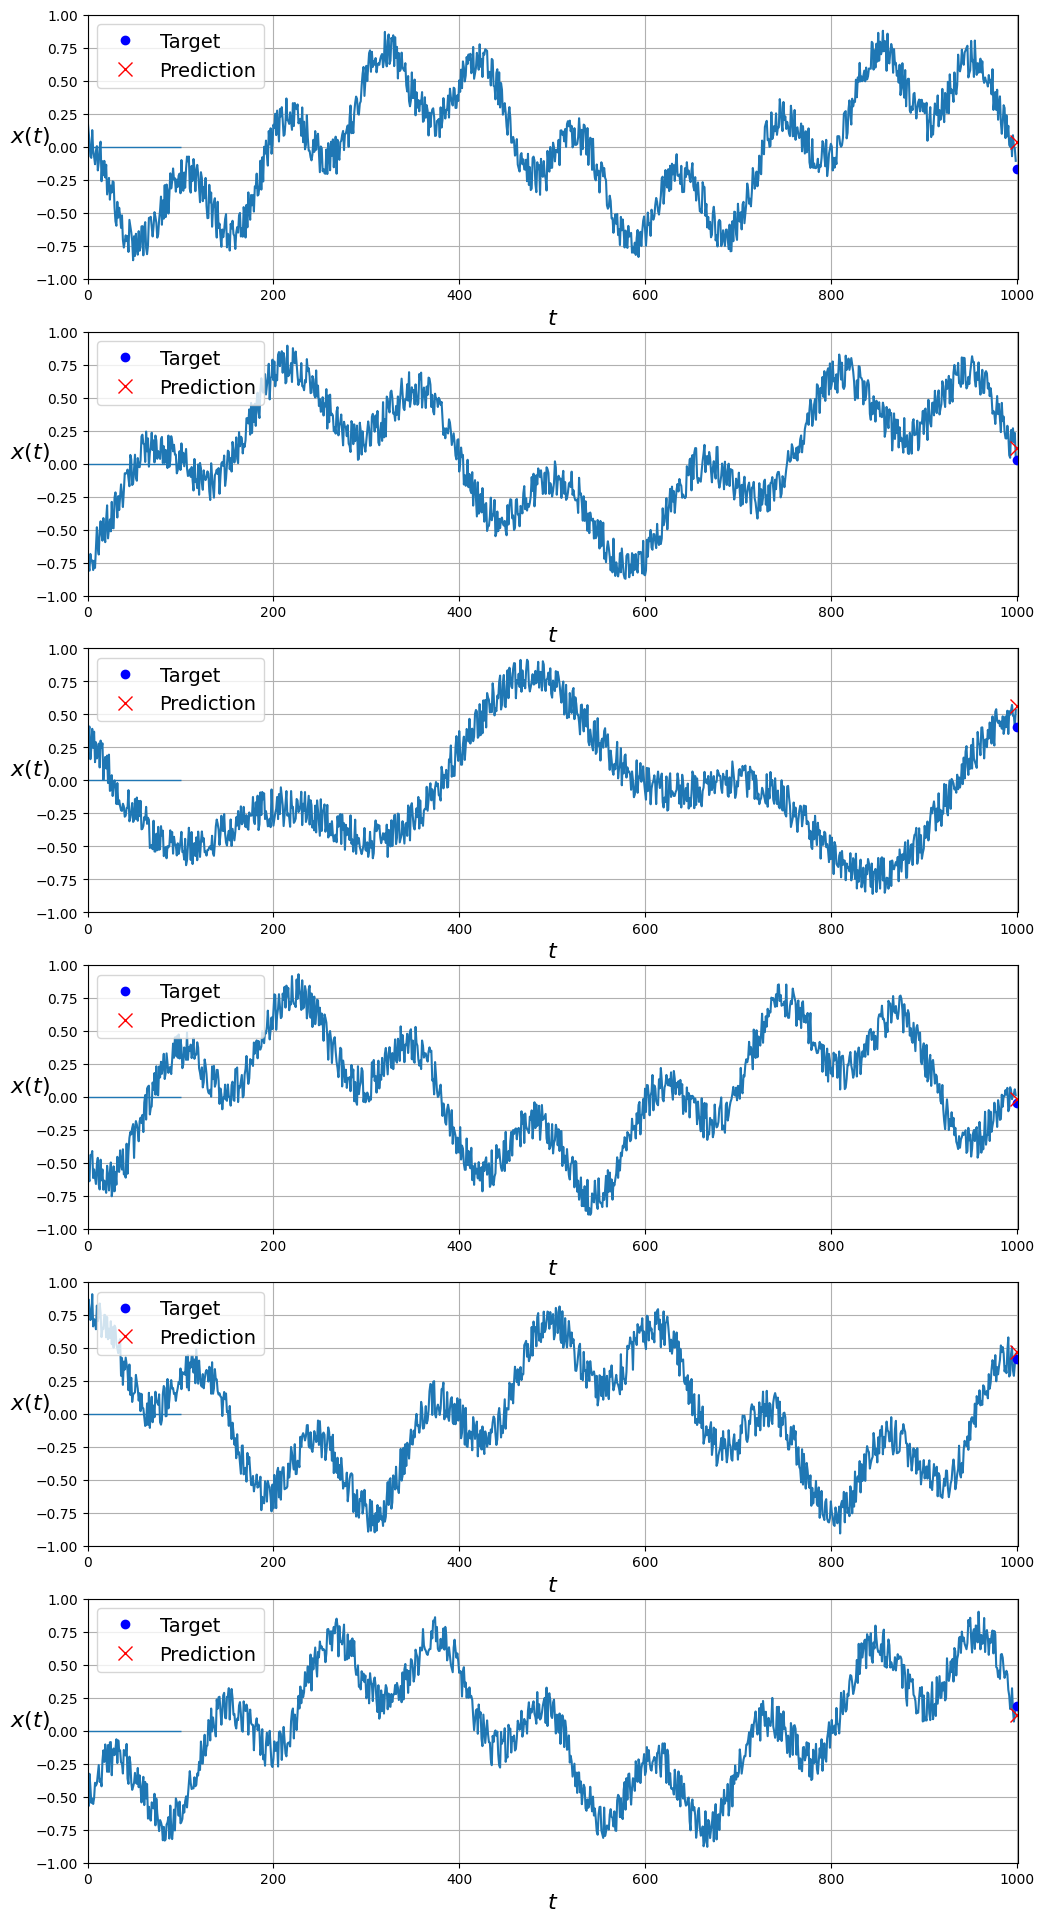

In [60]:
model_rnn3 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model_rnn3.compile(loss="mse", optimizer=optimizer)
model_rnn3.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
y_pred_rnn3 = model_rnn3.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_rnn3)))
plot_set(X_valid, y_valid, y_pred_rnn3)

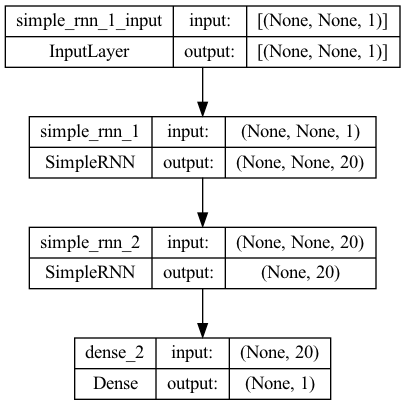

In [61]:
tf.keras.utils.plot_model(model_rnn3, "rnn.png", show_shapes=True)

In [62]:
model_rnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [70]:
series = generate_time_series(1, n_steps + 50)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(50):
    y_pred_one = model_rnn3.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)


1/1 [==============================] - 0s 30ms/step


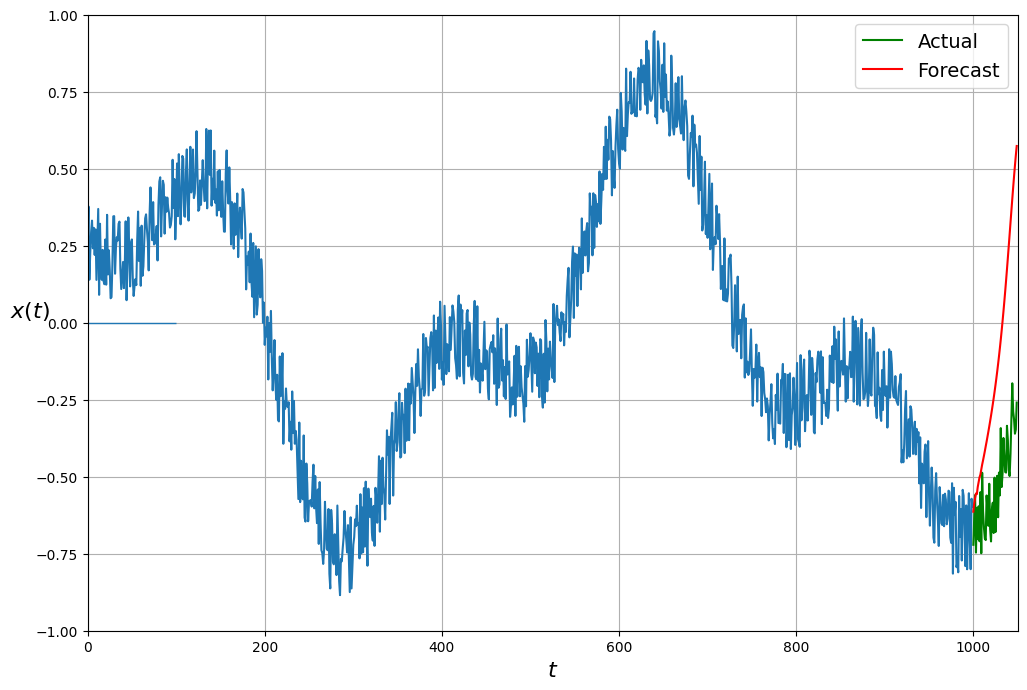

In [71]:
Y_pred = X[:, n_steps:]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# 10 values to predict

In [144]:
n_steps = 1000
series = generate_time_series(1000, n_steps + 50)
X_train, Y_train = series[:700, :n_steps], series[:700, -50:, 0]
X_valid, Y_valid = series[700:900, :n_steps], series[700:900, -50:, 0]
X_test, Y_test = series[900:, :n_steps], series[900:, -50:, 0]

In [145]:
np.random.seed(42)
tf.random.set_seed(42)

model_rnn10 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(50)
])

model_rnn10.compile(loss="mse", optimizer="adam")
history = model_rnn10.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
22/22 [==============================] - 4s 152ms/step - loss: 0.1343 - val_loss: 0.1008
Epoch 2/20
22/22 [==============================] - 3s 124ms/step - loss: 0.0804 - val_loss: 0.0648
Epoch 3/20
22/22 [==============================] - 3s 124ms/step - loss: 0.0535 - val_loss: 0.0436
Epoch 4/20
22/22 [==============================] - 3s 122ms/step - loss: 0.0395 - val_loss: 0.0336
Epoch 5/20
22/22 [==============================] - 3s 123ms/step - loss: 0.0318 - val_loss: 0.0269
Epoch 6/20
22/22 [==============================] - 3s 125ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 7/20
22/22 [==============================] - 3s 125ms/step - loss: 0.0207 - val_loss: 0.0178
Epoch 8/20
22/22 [==============================] - 3s 125ms/step - loss: 0.0191 - val_loss: 0.0186
Epoch 9/20
22/22 [==============================] - 3s 124ms/step - loss: 0.0190 - val_loss: 0.0223
Epoch 10/20
22/22 [==============================] - 3s 125ms/step - loss: 0.0159 - val_loss: 0.0128

1/1 [==============================] - 0s 152ms/step


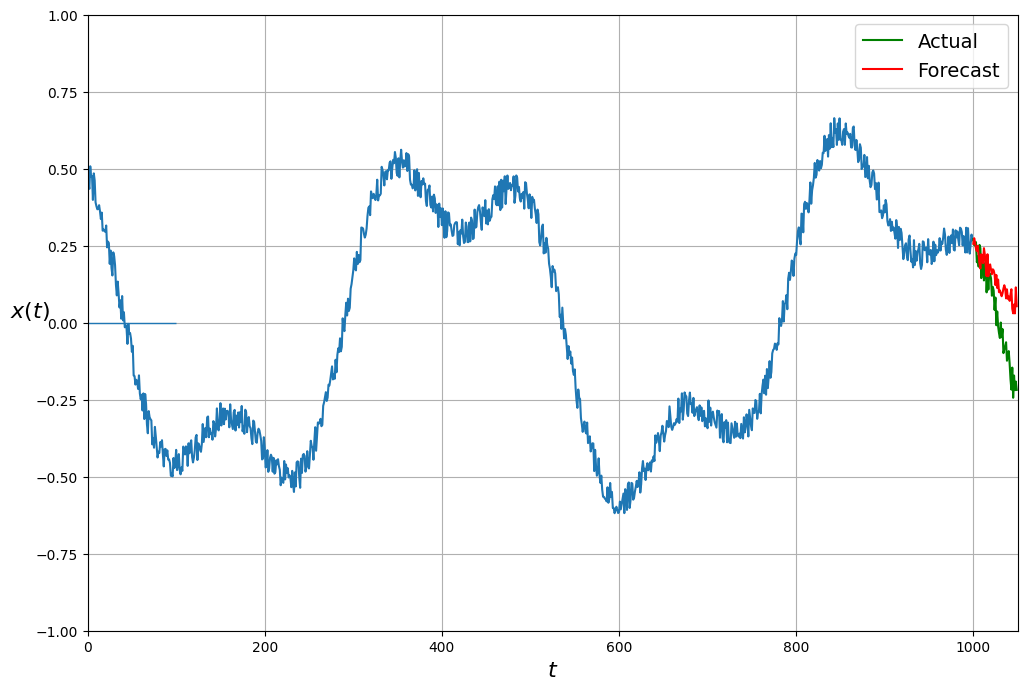

In [146]:
series = generate_time_series(1, 1000 + 50)
X_new, Y_new = series[:, :1000, :], series[:, -50:, :]
Y_pred = model_rnn10.predict(X_new)[..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [198]:
n_steps = 1000
series = generate_time_series(3000, n_steps + 50)
X_train = series[:2700, :n_steps]
X_valid = series[2700:2900, :n_steps]
X_test = series[2900:, :n_steps]
Y = np.empty((3000, n_steps, 50))
for step_ahead in range(1, 50 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:2700]
Y_valid = Y[2700:2900]
Y_test = Y[2900:]

In [200]:
series = generate_time_series(1, 1000 + 50)

In [199]:
model_rnn10d = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(50))
])
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model_rnn10d.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model_rnn10d.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
85/85 [==============================] - 12s 128ms/step - loss: 0.1651 - last_time_step_mse: 0.1727 - val_loss: 0.1495 - val_last_time_step_mse: 0.1558
Epoch 2/20
85/85 [==============================] - 11s 127ms/step - loss: 0.1470 - last_time_step_mse: 0.1504 - val_loss: 0.1482 - val_last_time_step_mse: 0.1545
Epoch 3/20
85/85 [==============================] - 11s 127ms/step - loss: 0.1466 - last_time_step_mse: 0.1504 - val_loss: 0.1463 - val_last_time_step_mse: 0.1529
Epoch 4/20
85/85 [==============================] - 11s 127ms/step - loss: 0.1483 - last_time_step_mse: 0.1519 - val_loss: 0.1472 - val_last_time_step_mse: 0.1524
Epoch 5/20
85/85 [==============================] - 11s 127ms/step - loss: 0.1463 - last_time_step_mse: 0.1499 - val_loss: 0.1461 - val_last_time_step_mse: 0.1528
Epoch 6/20
85/85 [==============================] - 11s 126ms/step - loss: 0.1427 - last_time_step_mse: 0.1466 - val_loss: 0.1426 - val_last_time_step_mse: 0.1509
Epoch 7/20
85/85 [====

1/1 [==============================] - 0s 186ms/step


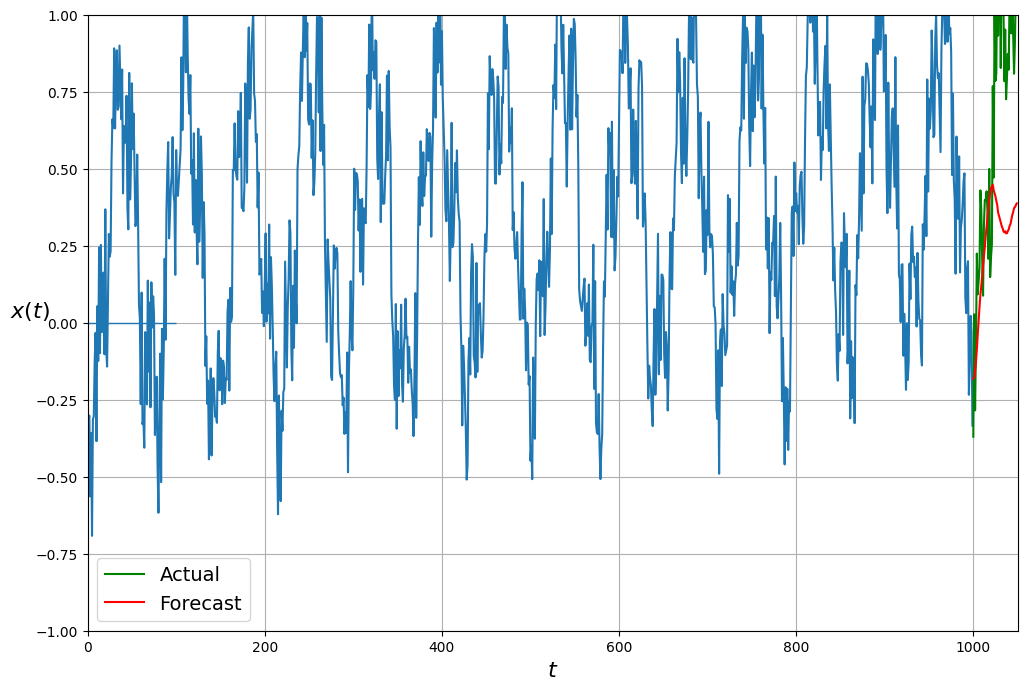

In [201]:
series = generate_time_series(1, 1000 + 50)
X_new, Y_new = series[:, :1000, :], series[:, -50:, :]
Y_pred = model_rnn10d.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [202]:
np.random.seed(42)
tf.random.set_seed(42)

model_gru = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(50))
])

model_gru.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model_gru.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
85/85 [==============================] - 17s 166ms/step - loss: 0.1935 - last_time_step_mse: 0.2140 - val_loss: 0.1611 - val_last_time_step_mse: 0.1686
Epoch 2/20
85/85 [==============================] - 14s 165ms/step - loss: 0.1544 - last_time_step_mse: 0.1579 - val_loss: 0.1519 - val_last_time_step_mse: 0.1594
Epoch 3/20
85/85 [==============================] - 14s 168ms/step - loss: 0.1481 - last_time_step_mse: 0.1514 - val_loss: 0.1484 - val_last_time_step_mse: 0.1551
Epoch 4/20
85/85 [==============================] - 14s 166ms/step - loss: 0.1463 - last_time_step_mse: 0.1497 - val_loss: 0.1474 - val_last_time_step_mse: 0.1542
Epoch 5/20
85/85 [==============================] - 14s 166ms/step - loss: 0.1451 - last_time_step_mse: 0.1491 - val_loss: 0.1456 - val_last_time_step_mse: 0.1519
Epoch 6/20
85/85 [==============================] - 14s 169ms/step - loss: 0.1414 - last_time_step_mse: 0.1470 - val_loss: 0.1395 - val_last_time_step_mse: 0.1444
Epoch 7/20
85/85 [====

1/1 [==============================] - 0s 432ms/step


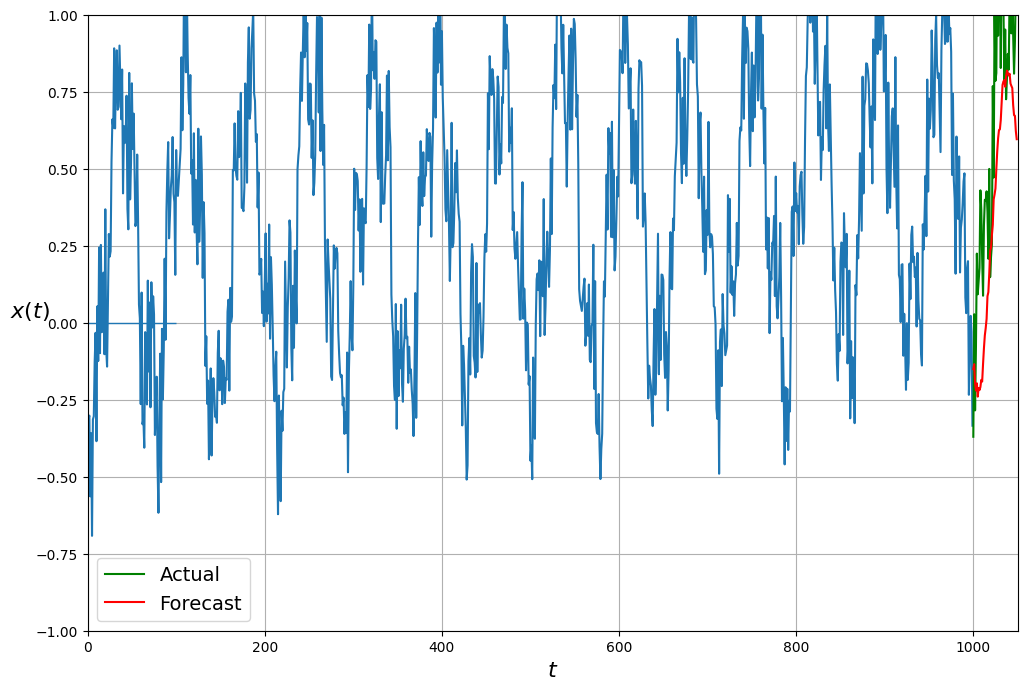

In [203]:
# series = generate_time_series(1, 1000 + 50)
X_new, Y_new = series[:, :1000, :], series[:, -50:, :]
Y_pred = model_gru.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [204]:
np.random.seed(42)
tf.random.set_seed(42)

model_wavenet = tf.keras.models.Sequential()
model_wavenet.add(tf.keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8,16,32) * 2:
    model_wavenet.add(tf.keras.layers.Conv1D(filters=20, kernel_size=4, padding="causal",
                                  activation="relu", dilation_rate=rate))
model_wavenet.add(tf.keras.layers.Conv1D(filters=50, kernel_size=1))
model_wavenet.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model_wavenet.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
85/85 [==============================] - 6s 56ms/step - loss: 0.2039 - last_time_step_mse: 0.2287 - val_loss: 0.1710 - val_last_time_step_mse: 0.1763
Epoch 2/20
85/85 [==============================] - 5s 55ms/step - loss: 0.1655 - last_time_step_mse: 0.1696 - val_loss: 0.1586 - val_last_time_step_mse: 0.1632
Epoch 3/20
85/85 [==============================] - 5s 57ms/step - loss: 0.1466 - last_time_step_mse: 0.1461 - val_loss: 0.1261 - val_last_time_step_mse: 0.1205
Epoch 4/20
85/85 [==============================] - 5s 59ms/step - loss: 0.1113 - last_time_step_mse: 0.1055 - val_loss: 0.0948 - val_last_time_step_mse: 0.0837
Epoch 5/20
85/85 [==============================] - 5s 60ms/step - loss: 0.0851 - last_time_step_mse: 0.0776 - val_loss: 0.0771 - val_last_time_step_mse: 0.0695
Epoch 6/20
85/85 [==============================] - 5s 60ms/step - loss: 0.0722 - last_time_step_mse: 0.0640 - val_loss: 0.0684 - val_last_time_step_mse: 0.0607
Epoch 7/20
85/85 [================

In [125]:
model_wavenet.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, None, 20)          100       
                                                                 
 conv1d_32 (Conv1D)          (None, None, 20)          1620      
                                                                 
 conv1d_33 (Conv1D)          (None, None, 20)          1620      
                                                                 
 conv1d_34 (Conv1D)          (None, None, 20)          1620      
                                                                 
 conv1d_35 (Conv1D)          (None, None, 20)          1620      
                                                                 
 conv1d_36 (Conv1D)          (None, None, 20)          1620      
                                                                 
 conv1d_37 (Conv1D)          (None, None, 20)        

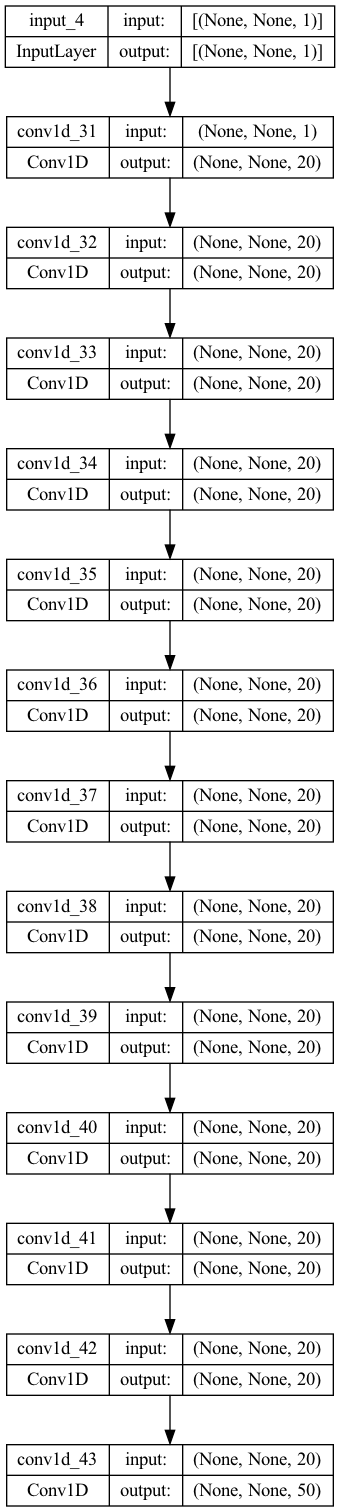

In [126]:
tf.keras.utils.plot_model(model_wavenet, "rnn.png", show_shapes=True)

1/1 [==============================] - 0s 180ms/step


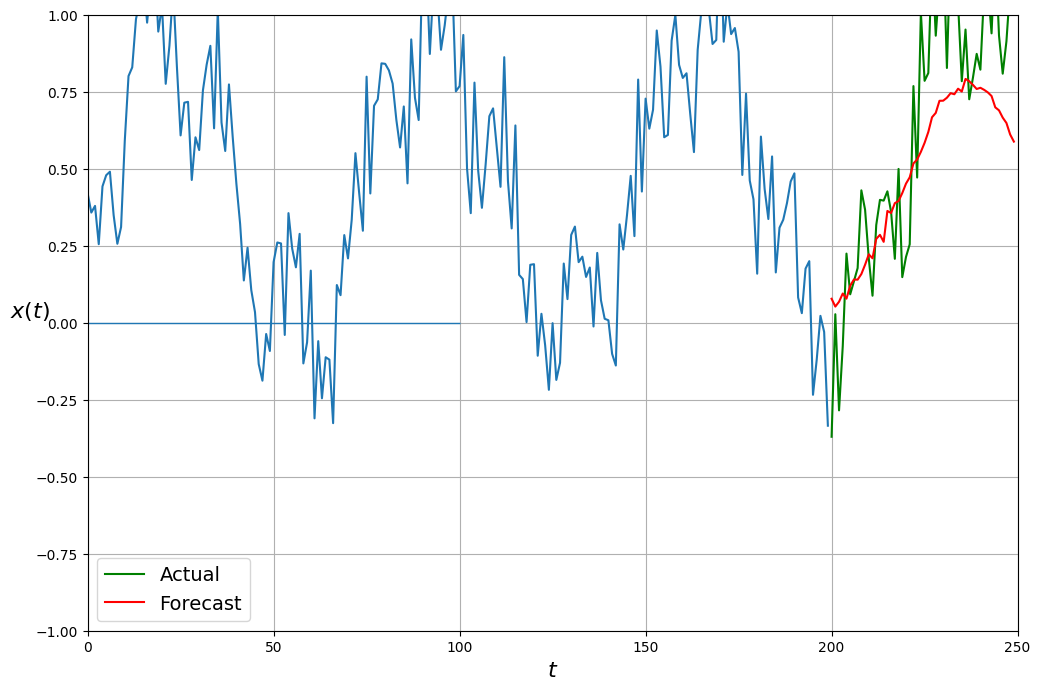

In [205]:
# series = generate_time_series(1, 1000 + 50)
X_new, Y_new = series[:, :1000, :], series[:, -50:, :]
Y_pred = model_wavenet.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new[:,800:,:], Y_new, Y_pred)
plt.show()